# Background and overview

## Context
The short-term rental market in Mexico is growing, offering lucrative opportunities for Airbnb investors. However, choosing the right city and property type can be challenging. This project aims to provide data-driven insights to help individual investors.

## Objective
This analysis aims to provide data-driven insights to help individual investors make informed decisions in the growing Mexican Airbnb market. Specifically, it will:

1. Identify the most profitable cities for Airbnb investment by analyzing revenue performance across different regions.
2. Rank property types by their revenue potential to help investors understand which types of listings generate the highest returns in specific locations.
3. Evaluate pricing strategies to optimize earnings, considering factors like nightly rates, fees, and location-based performance.
4. Provide actionable recommendations for investment strategies based on property type and city performance, with a focus on revenue optimization.

## Data Scope and Limitations

- Geographic Coverage: The dataset includes Airbnb listings from various cities across Mexico. However, it does not encompass all available properties, limiting the analysis to a subset of the market.

- Time Frame: The data begins from March 2025 onwards, capturing the most recent market trends and providing an up-to-date snapshot of the short-term rental landscape.

- Available Features:
    - Location Data: Information on city, latitude, and longitude, allowing for geographic performance analysis.
    - Pricing Information: Data on nightly rates, fees, and discounts associated with each listing.
    - Property Type: The type or category of rental unit, enabling an analysis of how different property types perform.

- Limitations:
    - Lack of Occupancy Data: The dataset does not include occupancy rates, so demand is approximated using review counts. This is a proxy measure and may not fully capture actual demand.
    - Absence of Seasonal Data: No details on seasonality are available, meaning any trends observed must be interpreted with caution, as they may not account for fluctuations in demand due to holidays or travel seasons.
    - Limited Property Details: The dataset lacks further property details (e.g., number of rooms, bathrooms, amenities), which could enhance the depth of the analysis and improve prediction accuracy.







# Preprocessing

## Data Structure Overview
Conducted exploratory data analysis (EDA) to identify missing values and remove redundancies. The data was also reorganized and columns were renamed for clarity and consistency.


In [23]:
# Data handling
import pandas as pd
import numpy as np


# Data analysis
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


print("Libraries loaded successfully")

Libraries loaded successfully


In [2]:
listings = pd.read_csv("airbnb_mexico_clean.csv")

In [3]:
listings.head(5)

,room_id,category,name,title,type,property_type,city,country,latitude,longitude,...,total_per_night,fee_airbnb,fee_cleaning,fee_total,discount_amount,rating_value,reviews,badges,badge,earliest_sighting
0,961013105393811072,entire_home,Bedroom H,"Apartment in Monterrey, Mexico",REGULAR,Apartment,Monterrey,Mexico,25.688704,-100.345513,...,28.0,4.0,0.0,4.0,0.0,4.90,146,['GUEST_FAVORITE'],1,2025-03-10
1,959469612100687174,entire_home,Spacious! Beautiful Apt Centro/Cacho/5minSY ga...,"Apartment in Tijuana, Mexico",REGULAR,Apartment,Tijuana,Mexico,32.522880,-117.032170,...,54.0,6.0,15.0,21.0,0.0,4.74,99,['SUPERHOST'],1,2025-03-10
2,28732111,entire_home,"Paseo Montejo, hotels, restaurants.","Apartment in Mérida, Mexico",REGULAR,Apartment,Mérida,Mexico,20.981810,-89.618670,...,43.0,6.0,0.0,6.0,0.0,4.80,503,['GUEST_FAVORITE'],1,2025-03-10
3,861604480503896063,entire_home,Loft 1 king lomas with terrace,"Apartment in San Luis Potosí, Mexico",REGULAR,Apartment,San Luis Potosí,Mexico,22.114199,-101.021427,...,47.0,7.0,6.0,13.0,0.0,4.93,134,['GUEST_FAVORITE'],1,2025-03-10
4,41340778,entire_home,Beautiful Studio Downtown-Amazing centric plac...,"Apartment in Santiago de Querétaro, Mexico",REGULAR,Apartment,Santiago De Querétaro,Mexico,20.591770,-100.388940,...,44.0,5.0,7.0,12.0,0.0,4.79,379,['SUPERHOST'],1,2025-03-10


In [4]:
listings["type"].value_counts()

type
REGULAR           149393
REPRESENTATIVE      2920
Name: count, dtype: int64

In [5]:
listings.dtypes

room_id                int64
category              object
name                  object
title                 object
type                  object
property_type         object
city                  object
country               object
latitude             float64
longitude            float64
price_per_night      float64
total_per_night      float64
fee_airbnb           float64
fee_cleaning         float64
fee_total            float64
discount_amount      float64
rating_value         float64
reviews                int64
badges                object
badge                  int64
earliest_sighting     object
dtype: object

In [6]:
# Dropping category column as it is better explained in property_type, country is unecessary as the data pertains only to mexico
# creating a new data frame as to not alter original

df_air = listings.drop(["category","country"], axis=1).copy()


In [7]:
df_air.rename(columns={"price_per_night": "night_rate", "total_per_night": "gross_price", "property_type": "accommodation"}, inplace=True)
print(df_air.columns)

Index(['room_id', 'name', 'title', 'type', 'accommodation', 'city', 'latitude',
       'longitude', 'night_rate', 'gross_price', 'fee_airbnb', 'fee_cleaning',
       'fee_total', 'discount_amount', 'rating_value', 'reviews', 'badges',
       'badge', 'earliest_sighting'],
      dtype='object')


In [8]:
new_order = [
    'room_id', 'name', 'title', 'type', 'accommodation', 'city',
    'fee_airbnb', 'fee_cleaning', 'fee_total','night_rate',
     'discount_amount', 'gross_price', 'latitude',
    'longitude', 'rating_value', 'reviews', 'badges','badge', 'earliest_sighting'
]

df_air = df_air[new_order]
df_air.columns

Index(['room_id', 'name', 'title', 'type', 'accommodation', 'city',
       'fee_airbnb', 'fee_cleaning', 'fee_total', 'night_rate',
       'discount_amount', 'gross_price', 'latitude', 'longitude',
       'rating_value', 'reviews', 'badges', 'badge', 'earliest_sighting'],
      dtype='object')

In [9]:
print(df_air.describe())
print(df_air.info())

            room_id     fee_airbnb   fee_cleaning      fee_total  \
count  1.523130e+05  152313.000000  152313.000000  152313.000000   
mean   6.125519e+17      33.765266      13.914492      47.679758   
std    5.254055e+17      42.051845      16.994357      51.008282   
min    1.465300e+04       0.000000       0.000000       0.000000   
25%    4.389755e+07       8.000000       0.000000      15.000000   
50%    7.744993e+17      21.000000      10.000000      32.000000   
75%    1.097943e+18      44.000000      22.000000      65.000000   
max    1.373240e+18     802.000000     175.000000     837.000000   

          night_rate  discount_amount    gross_price       latitude  \
count  152313.000000    152313.000000  152313.000000  152313.000000   
mean       72.194022        -1.094437     118.945996      20.535794   
std        60.598767        11.118771      96.702533       3.142409   
min         9.000000      -445.000000      13.000000      15.658470   
25%        35.000000         0.0

# Profitability Analysis of Airbnb Properties by Location

This report provides a detailed analysis of the profitability of Airbnb properties across various cities in Mexico. The analysis covers the calculation of net revenue, estimated monthly earnings, and the identification of the top cities by revenue. Additionally, the distribution of data, outliers, and correlations between key variables are explored.

## 1. Estimated Revenue Calculation

### Step 1: Calculation of Estimated Revenue
The **estimated revenue** is derived by subtracting the **Airbnb fee** from the **gross price**. This metric is crucial for determining the actual earnings after Airbnb’s service charges.

### Step 2: Monthly Earnings Calculation
To estimate the **monthly earnings**, the analysis assumes that the average Airbnb rental is booked for 16 nights per month (equivalent to 4 nights each week for 4 weeks). This assumption is based on the typical booking patterns for Airbnb properties.

## 2. Top 30 Cities by Revenue

The top 30 cities are identified based on their total revenue generated across various property types (e.g., Apartment, Cabin, Condo, Guesthouse, Home, Hotel, etc.). The table below provides a breakdown of the revenue by city and property type, allowing for a comparative analysis of earnings across different locations.

| City                | Apartment  | Cabin    | Condo    | Guest    | Guesthouse | Home     | Hotel    | Loft     | Place    | Room     | Total Revenue |
|---------------------|------------|----------|----------|----------|-------------|----------|----------|----------|----------|----------|---------------|
| Tulum               | $1,396.80  | $1,459.65| $1,606.83| $1,440.00| $2,002.56   | $2,730.14 | $4,161.43| $1,274.48| $872.00  | $649.60  | $1,759.35     |
| Brisas De Zicatela  | $1,520.97  | $1,957.33| $2,476.00| $985.04  | $842.38     | $4,593.83 | $1,251.90| $1,370.67| $1,098.46| $1,059.73| $1,715.63     |
| El Pescadero        | $4,576.00  | $1,873.51| $5,386.67| $0.00    | $0.00       | $4,120.00 | $0.00    | $0.00    | $0.00    | $0.00    | $1,595.62     |
| Isla Mujeres        | $1,515.70  | $0.00    | $3,165.27| $0.00    | $1,599.56   | $2,936.84 | $1,387.25| $1,740.55| $802.29  | $1,538.18| $1,468.56     |
| Oaxaca              | $1,118.12  | $4,773.33| $1,248.00| $612.97  | $1,303.76   | $2,116.36 | $1,114.95| $1,052.05| $369.48  | $405.50  | $1,411.45     |
| Puerto Vallarta     | $1,683.54  | $0.00    | $2,070.49| $647.97  | $873.00     | $4,509.48 | $1,363.04| $1,109.45| $731.72  | $1,076.63| $1,406.53     |
| Quintana Roo        | $2,052.20  | $1,116.80| $3,669.56| $0.00    | $0.00       | $1,833.00 | $712.00  | $1,500.06| $2,192.00| $688.00  | $1,376.36     |
| Playa Del Carmen    | $1,355.30  | $0.00    | $1,737.22| $1,142.53| $752.00     | $5,389.56 | $516.80  | $838.56  | $1,294.53| $571.35  | $1,359.78     |
| Acapulco De Juárez  | $1,188.71  | $0.00    | $1,866.84| $973.26  | $0.00       | $3,942.81 | $1,120.00| $1,587.51| $772.49  | $920.00  | $1,237.16     |
| Cancún              | $1,670.44  | $0.00    | $1,892.72| $646.16  | $881.44     | $2,031.77 | $1,638.86| $1,463.05| $966.55  | $840.82  | $1,203.18     |

## 3. Validating the Earnings

To ensure that the earnings estimates are representative, the **estimated monthly earnings** were cross-referenced with [Airbnb’s approximated earnings tool](https://www.airbnb.com/host/homes?room_type=ENTIRE_HOME), which provides similar revenue estimates. The results indicate that the calculations align well with the earnings approximations provided by Airbnb.

## 4. Exploratory Data Analysis (EDA)

The Exploratory Data Analysis (EDA) aimed to examine the distribution of key variables, identify potential outliers, and visualize the relationships between various features such as property type, city, and revenue performance. The distribution of revenue across cities and property types was examined to understand the range and concentration of earnings.



In [10]:
# Calculate the estimated revenue as Gross Price - Airbnb Fee
df_air['estimated_revenue'] = df_air['gross_price'] - df_air['fee_airbnb']

# Calculation if taxes are of interest
df_air['iva'] = df_air['estimated_revenue'] * 0.16  # 16% IVA

# If needed, we could subtract the IVA from the estimated revenue to show the net amount after tax.
df_air['net_revenue'] = df_air['estimated_revenue'] - df_air['iva']

# Remove rows with negative or zero estimated revenue
df_air = df_air[df_air['estimated_revenue'] > 0]

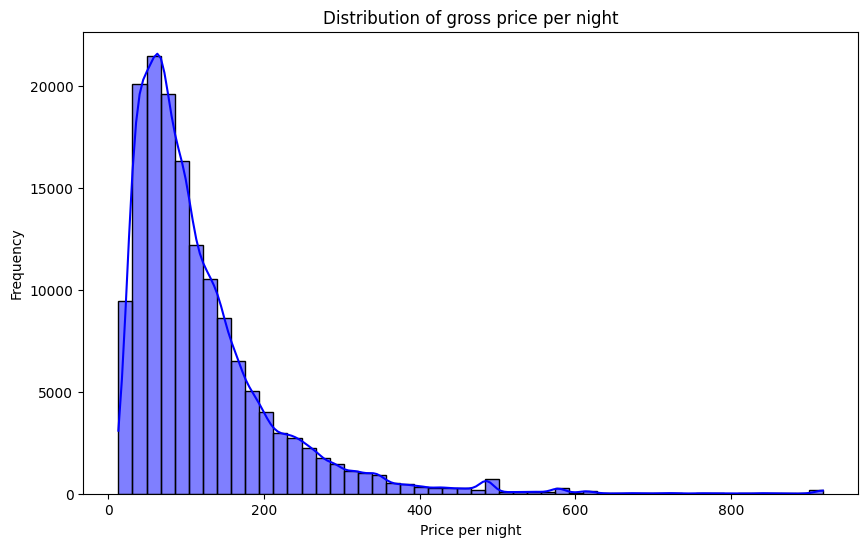

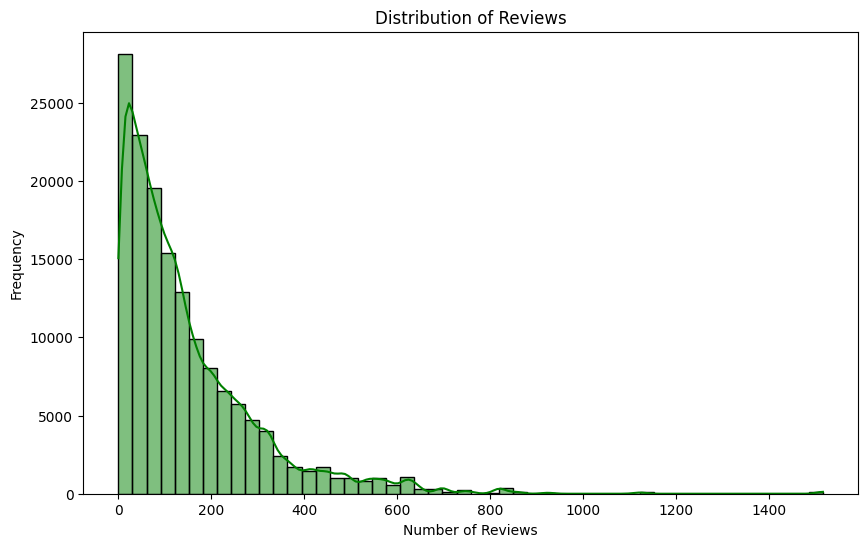

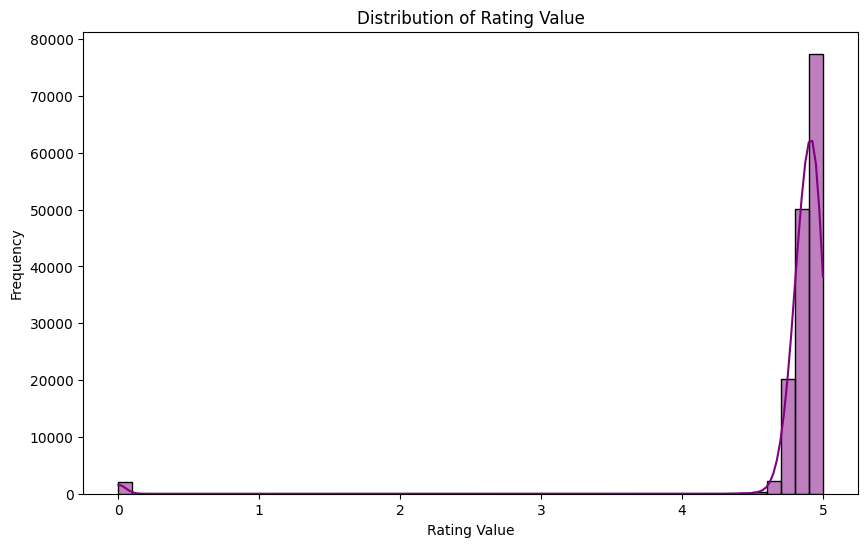

In [11]:
#gross price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_air["gross_price"], bins=50, kde=True, color="blue")
plt.title("Distribution of gross price per night")
plt.xlabel("Price per night")
plt.ylabel("Frequency")
plt.show()

# Reviews Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_air['reviews'], bins=50, kde=True, color='green')
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Rating Value Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_air['rating_value'], bins=50, kde=True, color='purple')
plt.title('Distribution of Rating Value')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.show()

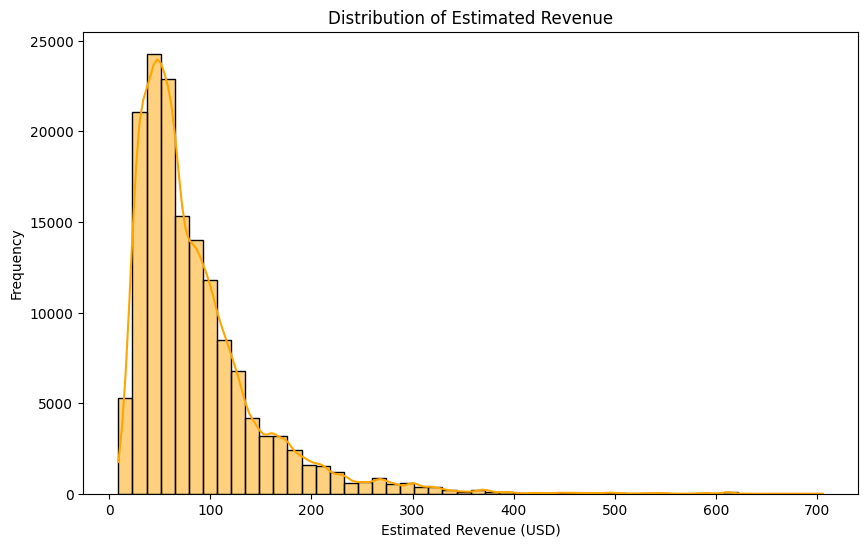

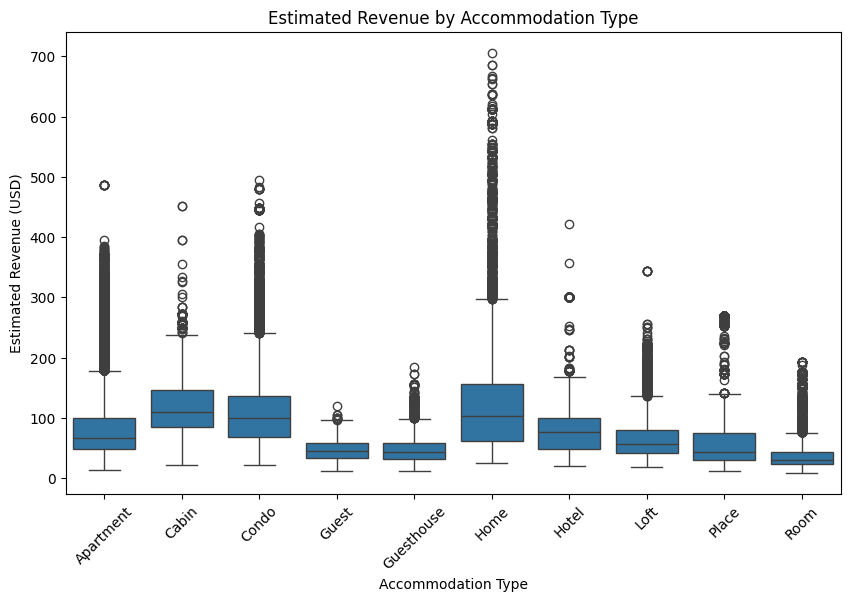

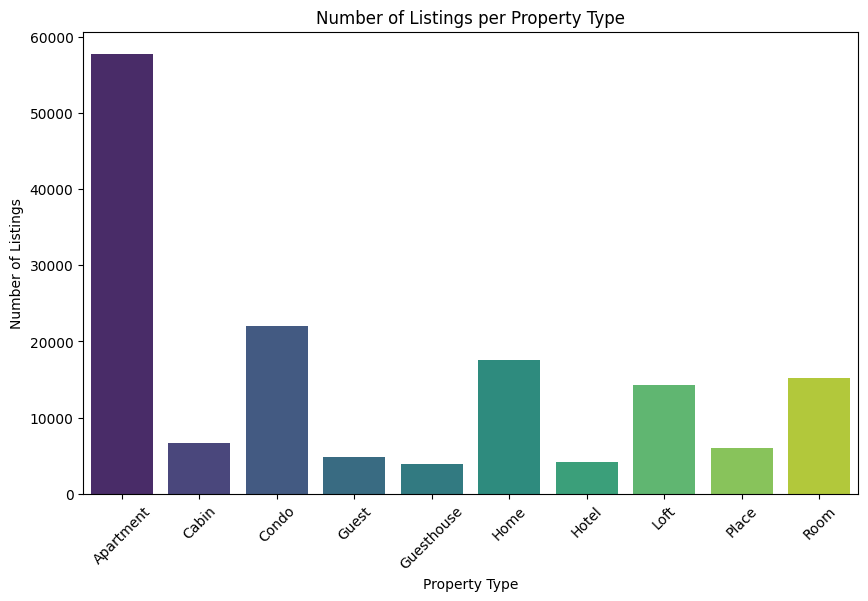

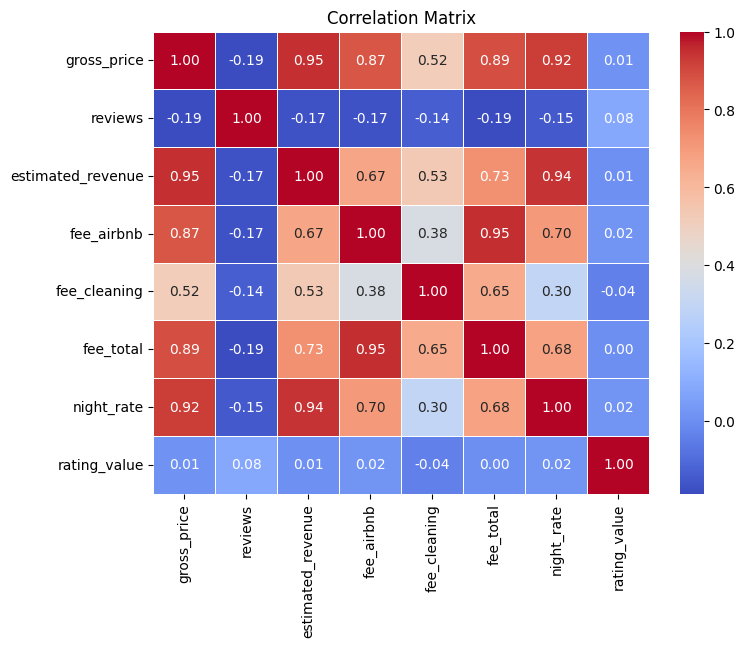

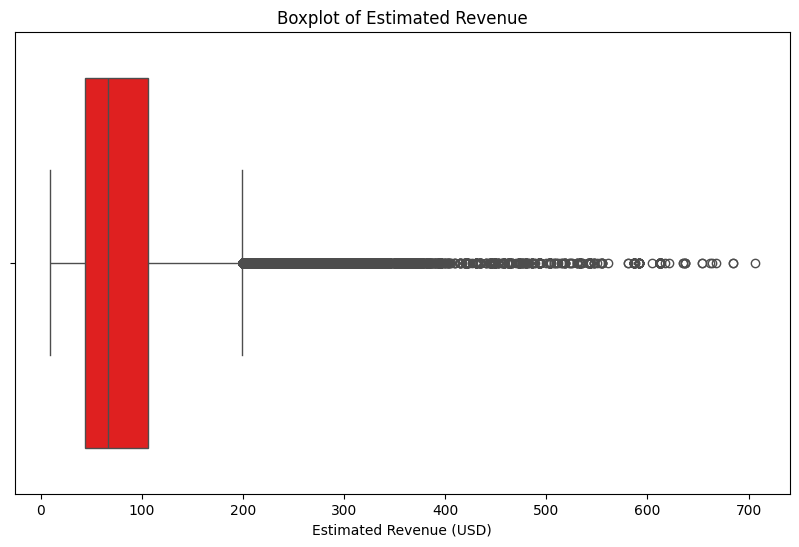

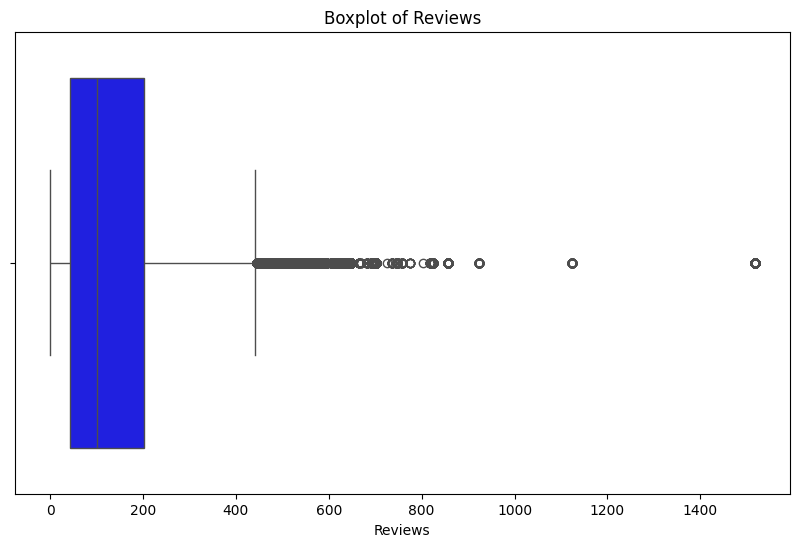

In [12]:
# Distribution of Estimated Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df_air['estimated_revenue'], bins=50, kde=True, color='orange')
plt.title('Distribution of Estimated Revenue')
plt.xlabel('Estimated Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Estimated Revenue by Accommodation Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='accommodation', y='estimated_revenue', data=df_air)
plt.title('Estimated Revenue by Accommodation Type')
plt.xlabel('Accommodation Type')
plt.ylabel('Estimated Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

#Amount of accommodations
plt.figure(figsize=(10, 6))
sns.countplot(x=df_air["accommodation"], palette="viridis", hue=df_air["accommodation"])
plt.title("Number of Listings per Property Type")
plt.xlabel("Property Type")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

# Correlation Matrix including Estimated Revenue
corr = df_air[['gross_price', 'reviews', 'estimated_revenue', 'fee_airbnb', 'fee_cleaning', 'fee_total','night_rate','rating_value']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#Boxplot of Estimated Revenue (to check for outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_air['estimated_revenue'], color='red')
plt.title('Boxplot of Estimated Revenue')
plt.xlabel('Estimated Revenue (USD)')
plt.show()

# Boxplot of Reviews (to check for outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_air['reviews'], color='blue')
plt.title('Boxplot of Reviews')
plt.xlabel('Reviews')
plt.show()

In [13]:
df_air.columns

Index(['room_id', 'name', 'title', 'type', 'accommodation', 'city',
       'fee_airbnb', 'fee_cleaning', 'fee_total', 'night_rate',
       'discount_amount', 'gross_price', 'latitude', 'longitude',
       'rating_value', 'reviews', 'badges', 'badge', 'earliest_sighting',
       'estimated_revenue', 'iva', 'net_revenue'],
      dtype='object')

In [14]:
def calculate_earnings(df, nights_booked=16):
    """Calculates estimated monthly earnings."""
    df['nightly_earnings'] = df['gross_price'] - df['fee_airbnb']
    df['nights_booked_per_month'] = nights_booked
    df['estimated_monthly_earnings'] = df['nightly_earnings'] * df['nights_booked_per_month']
    df = df[df['estimated_monthly_earnings'] > 0]
    return df

C:\Users\vchri\AppData\Local\Temp\ipykernel_16760\7828042.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"${x:,.2f}" for x in ax.get_xticks()])


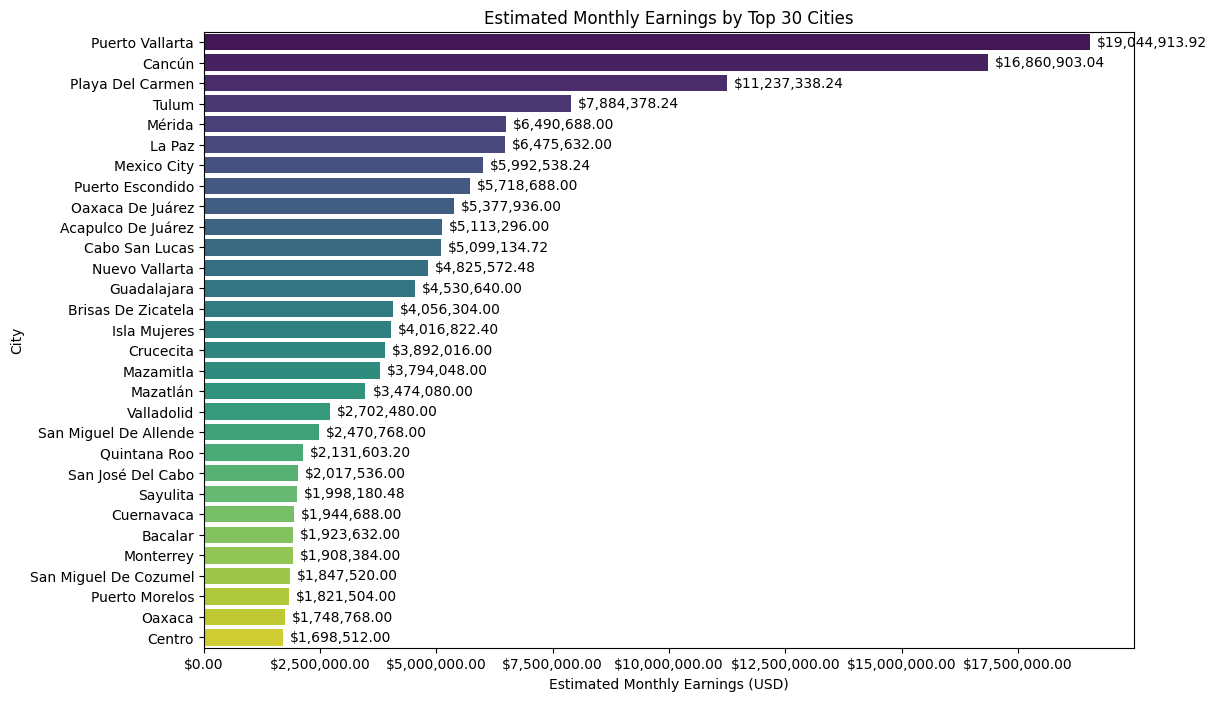

In [15]:
# Use the function to calculate estimated earnings
df_air = calculate_earnings(df_air, nights_booked=16)

# Aggregate revenue by city (sum of estimated monthly earnings per city)
city_revenue = df_air.groupby('city')['estimated_monthly_earnings'].sum().reset_index()

#  Sort cities by total estimated revenue in descending order
city_revenue_sorted = city_revenue.sort_values(by='estimated_monthly_earnings', ascending=False)

# Limit to top 30 cities for better clarity in visualization
top_30_cities = city_revenue_sorted.head(30)

# Plot the total estimated revenue by top 30 cities (Bar Plot)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='estimated_monthly_earnings', y='city', data=top_30_cities, palette='viridis', hue='city')
plt.title('Estimated Monthly Earnings by Top 30 Cities')
plt.xlabel('Estimated Monthly Earnings (USD)')
plt.ylabel('City')

# Set x-axis labels with revenue formatted as currency
ax.set_xticklabels([f"${x:,.2f}" for x in ax.get_xticks()])

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Show plot
plt.show()





In [16]:
# Step 1: Calculate estimated earnings using the function
df_air = calculate_earnings(df_air, nights_booked=16)

# Step 2: Aggregate revenue by city and accommodation type (average estimated monthly earnings per group)
city_accom_revenue = df_air.groupby(['city', 'accommodation'])['estimated_monthly_earnings'].mean().reset_index()

# Step 3: Pivot the table so that accommodation types become columns
city_accom_pivot = city_accom_revenue.pivot_table(index='city', columns='accommodation', values='estimated_monthly_earnings', aggfunc='mean', fill_value=0)

# Step 4: Sort by total average revenue (mean across all accommodation types) and select top 30 cities
city_accom_pivot['total_revenue'] = city_accom_pivot.mean(axis=1)
city_accom_pivot_sorted = city_accom_pivot.sort_values(by='total_revenue', ascending=False).head(30)

# Step 5: Format values as USD
city_accom_pivot_sorted = city_accom_pivot_sorted.map(lambda x: f'${x:,.2f}')

# Step 6: Export the result to a CSV or Excel file
city_accom_pivot_sorted.to_csv('top_30_cities_average_monthly_earnings_by_accommodation_usd.csv', index=True)

# Optionally, you can export to an Excel file for better formatting
# city_accom_pivot_sorted.to_excel('top_30_cities_average_monthly_earnings_by_accommodation_usd.xlsx', index=True)

# Show a preview of the first few rows
city_accom_pivot_sorted.head(10)





accommodation,Apartment,Cabin,Condo,Guest,Guesthouse,Home,Hotel,Loft,Place,Room,total_revenue
city,,,,,,,,,,,
Tulum,"$1,396.80","$1,459.65","$1,606.83","$1,440.00","$2,002.56","$2,730.14","$4,161.43","$1,274.48",$872.00,$649.60,"$1,759.35"
Brisas De Zicatela,"$1,520.97","$1,957.33","$2,476.00",$985.04,$842.38,"$4,593.83","$1,251.90","$1,370.67","$1,098.46","$1,059.73","$1,715.63"
El Pescadero,"$4,576.00","$1,873.51","$5,386.67",$0.00,$0.00,"$4,120.00",$0.00,$0.00,$0.00,$0.00,"$1,595.62"
Isla Mujeres,"$1,515.70",$0.00,"$3,165.27",$0.00,"$1,599.56","$2,936.84","$1,387.25","$1,740.55",$802.29,"$1,538.18","$1,468.56"
Oaxaca,"$1,118.12","$4,773.33","$1,248.00",$612.97,"$1,303.76","$2,116.36","$1,114.95","$1,052.05",$369.48,$405.50,"$1,411.45"
Puerto Vallarta,"$1,683.54",$0.00,"$2,070.49",$647.97,$873.00,"$4,509.48","$1,363.04","$1,109.45",$731.72,"$1,076.63","$1,406.53"
Quintana Roo,"$2,052.20","$1,116.80","$3,669.56",$0.00,$0.00,"$1,833.00",$712.00,"$1,500.06","$2,192.00",$688.00,"$1,376.36"
Playa Del Carmen,"$1,355.30",$0.00,"$1,737.22","$1,142.53",$752.00,"$5,389.56",$516.80,$838.56,"$1,294.53",$571.35,"$1,359.78"
Acapulco De Juárez,"$1,188.71",$0.00,"$1,866.84",$973.26,$0.00,"$3,942.81","$1,120.00","$1,587.51",$772.49,$920.00,"$1,237.16"


In [17]:
# Step 1: Calculate nightly earnings using the function (ignoring monthly estimates)
df_air = calculate_earnings(df_air)  # Default nights_booked=16, but we only use nightly earnings

# Step 2: Aggregate average nightly earnings by city and accommodation type
city_accom_revenue = df_air.groupby(['city', 'accommodation'])['nightly_earnings'].mean().reset_index()

# Step 3: Pivot the table so that accommodation types become columns
city_accom_pivot = city_accom_revenue.pivot_table(index='city', columns='accommodation', values='nightly_earnings', aggfunc='mean', fill_value=0)

# Step 4: Sort by total average revenue (mean across all accommodation types) and select top 30 cities
city_accom_pivot['total_revenue'] = city_accom_pivot.mean(axis=1)
city_accom_pivot_sorted = city_accom_pivot.sort_values(by='total_revenue', ascending=False).head(30)

# Step 5: Format values as USD
city_accom_pivot_sorted = city_accom_pivot_sorted.map(lambda x: f'${x:,.2f}')

# Step 6: Export the result to a CSV or Excel file
city_accom_pivot_sorted.to_csv('top_30_cities_average_nightly_earnings_by_accommodation_usd.csv', index=True)

# Optionally, export to Excel for better formatting
# city_accom_pivot_sorted.to_excel('top_30_cities_average_nightly_earnings_by_accommodation_usd.xlsx', index=True)

# Show a preview of the first few rows
city_accom_pivot_sorted.head(10)


accommodation,Apartment,Cabin,Condo,Guest,Guesthouse,Home,Hotel,Loft,Place,Room,total_revenue
city,,,,,,,,,,,
Tulum,$87.30,$91.23,$100.43,$90.00,$125.16,$170.63,$260.09,$79.66,$54.50,$40.60,$109.96
Brisas De Zicatela,$95.06,$122.33,$154.75,$61.56,$52.65,$287.11,$78.24,$85.67,$68.65,$66.23,$107.23
El Pescadero,$286.00,$117.09,$336.67,$0.00,$0.00,$257.50,$0.00,$0.00,$0.00,$0.00,$99.73
Isla Mujeres,$94.73,$0.00,$197.83,$0.00,$99.97,$183.55,$86.70,$108.78,$50.14,$96.14,$91.79
Oaxaca,$69.88,$298.33,$78.00,$38.31,$81.48,$132.27,$69.68,$65.75,$23.09,$25.34,$88.22
Puerto Vallarta,$105.22,$0.00,$129.41,$40.50,$54.56,$281.84,$85.19,$69.34,$45.73,$67.29,$87.91
Quintana Roo,$128.26,$69.80,$229.35,$0.00,$0.00,$114.56,$44.50,$93.75,$137.00,$43.00,$86.02
Playa Del Carmen,$84.71,$0.00,$108.58,$71.41,$47.00,$336.85,$32.30,$52.41,$80.91,$35.71,$84.99
Acapulco De Juárez,$74.29,$0.00,$116.68,$60.83,$0.00,$246.43,$70.00,$99.22,$48.28,$57.50,$77.32


# Impact of Fees & Discounts on Competitiveness

This section analyzes the relationship between various fees, discounts, pricing strategies, and key performance metrics of Airbnb properties, including ratings, reviews, and badge attainment. The analysis uses correlation analysis, visualizations, and statistical tests to determine the impact of these factors on property competitiveness.

## 1. Correlation Analysis

### Key Findings

#### Strong Positive Correlations:
- Night Rate (0.94) and Gross Price (0.95) show highly positive correlations with Estimated Monthly Earnings, indicating that properties with higher nightly rates and gross prices tend to generate significantly higher earnings.
- Fee Total (0.73) and Fee Airbnb (0.67) also exhibit positive correlations with Estimated Monthly Earnings, suggesting that these fees are associated with higher earnings, although their influence is weaker than that of pricing factors.

#### Weak or No Correlations:
- Discount Amount (-0.07) and Rating Value (0.01) have negligible correlations with Estimated Monthly Earnings, indicating that discounting and ratings have no significant impact on earnings.
- Reviews (-0.17) show a weak negative correlation with earnings, but this relationship is minimal and not substantial enough to be of predictive value. There is no meaningful statistical impact of reviews on earnings in this dataset.

## 2. Statistical Analysis & Visualizations

### Heatmap Visualization
The correlation heatmap reveals the relationships between key variables. The strongest correlations are between Night Rate, Gross Price, and Estimated Monthly Earnings, followed by moderate positive correlations between Fee Total and Fee Airbnb with earnings. Discount Amount and Rating Value show negligible or weak correlations with earnings.

### Scatter Plots
Scatter plots illustrating the relationships between Discount Amount, Fees, and Ratings demonstrate that there is no significant relationship between discounting and ratings. The lack of correlation between these variables and earnings further supports the conclusion that these factors do not significantly impact property performance.


## 3. Key Insights

### Strong Positive Correlations:
- Night Rate and Gross Price are the most significant drivers of Estimated Monthly Earnings, with highly positive correlations. Properties with higher nightly rates and gross prices tend to perform better in terms of revenue generation.
- Fee Total and Fee Airbnb also correlate positively with earnings, but their impact is secondary to pricing factors.

### Weak or No Correlations:
- Discount Amount and Rating Value exhibit almost no correlation with Estimated Monthly Earnings, indicating that discounting and ratings have negligible effects on profitability.
- Reviews have a weak negative correlation with earnings, but this relationship is too weak to be considered significant.

### Property Type Performance:
- Home, Apartment, and Guesthouse properties generally generate the highest earnings, making them the most profitable property types in this dataset.
- Hotel, Loft, and Place properties tend to have lower earnings, which suggests that they may be less competitive in terms of profitability.

## 4. Conclusion
The analysis indicates that pricing factors, particularly Night Rate and Gross Price, are the most significant contributors to higher earnings for Airbnb properties. While fees like Fee Total and Fee Airbnb are also correlated with earnings, their impact is less pronounced compared to the pricing factors. Discounting and reviews do not have any meaningful impact on profitability in this dataset, reinforcing the importance of setting competitive prices to maximize earnings.

In terms of property types, Home, Apartment, and Guesthouse properties consistently perform better, while Hotel, Loft, and Place properties may require further investigation to understand the underlying reasons for their lower earnings.



In [18]:
df_air.dtypes

room_id                         int64
name                           object
title                          object
type                           object
accommodation                  object
city                           object
fee_airbnb                    float64
fee_cleaning                  float64
fee_total                     float64
night_rate                    float64
discount_amount               float64
gross_price                   float64
latitude                      float64
longitude                     float64
rating_value                  float64
reviews                         int64
badges                         object
badge                           int64
earliest_sighting              object
estimated_revenue             float64
iva                           float64
net_revenue                   float64
nightly_earnings              float64
nights_booked_per_month         int64
estimated_monthly_earnings    float64
dtype: object

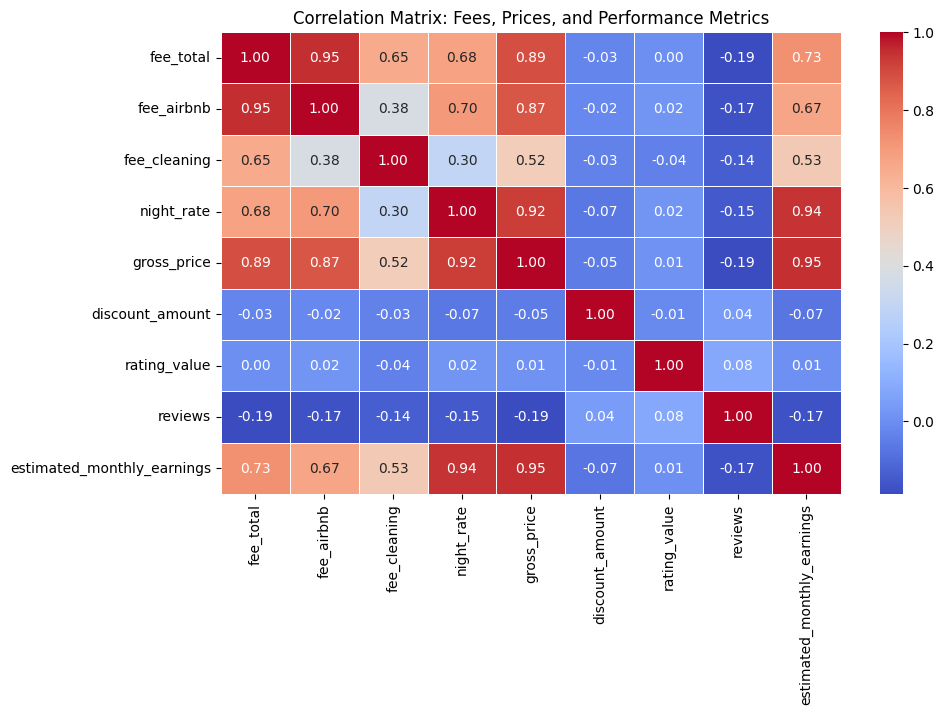

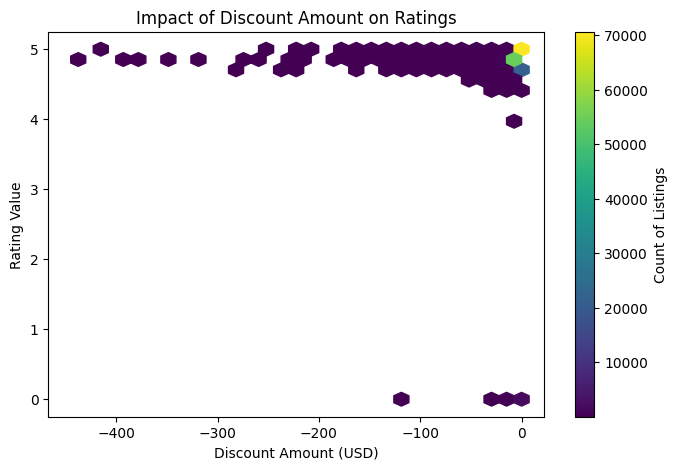

In [19]:
# Select relevant columns for correlation analysis
cols = [
    "fee_total", "fee_airbnb", "fee_cleaning", "night_rate", "gross_price", "discount_amount", 
    "rating_value", "reviews", "estimated_monthly_earnings", 
]

df_corr = df_air[cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix: Fees, Prices, and Performance Metrics")
plt.show()


#hexbin
plt.figure(figsize=(8, 5))
plt.hexbin(df_air["discount_amount"], df_air["rating_value"], gridsize=30, cmap="viridis", mincnt=1)
plt.colorbar(label="Count of Listings")
plt.title("Impact of Discount Amount on Ratings")
plt.xlabel("Discount Amount (USD)")
plt.ylabel("Rating Value")
plt.show()





In [20]:
df_air.columns

Index(['room_id', 'name', 'title', 'type', 'accommodation', 'city',
       'fee_airbnb', 'fee_cleaning', 'fee_total', 'night_rate',
       'discount_amount', 'gross_price', 'latitude', 'longitude',
       'rating_value', 'reviews', 'badges', 'badge', 'earliest_sighting',
       'estimated_revenue', 'iva', 'net_revenue', 'nightly_earnings',
       'nights_booked_per_month', 'estimated_monthly_earnings'],
      dtype='object')

In [21]:
# For ANOVA, we need to group the data by the categorical variable (e.g., 'city')
groups = df_air.groupby('city')['estimated_monthly_earnings'].apply(list)



In [24]:
# Apply ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Print the result
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 172.92487295435274
P-value: 0.0


In [25]:


# Perform Tukey HSD test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(df_air['estimated_monthly_earnings'], df_air['accommodation'])
print(tukey_results)


        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1     group2    meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------
 Apartment      Cabin   535.1558    0.0   497.3978   572.9137   True
 Apartment      Condo   466.8104    0.0   443.6649   489.9558   True
 Apartment      Guest  -592.2297    0.0  -636.1675   -548.292   True
 Apartment Guesthouse   -566.477    0.0  -614.5824  -518.3715   True
 Apartment       Home   707.4248    0.0   682.2561   732.5935   True
 Apartment      Hotel   -30.8687  0.551   -78.1144    16.3769  False
 Apartment       Loft  -266.8061    0.0  -294.0819  -239.5304   True
 Apartment      Place  -364.2223    0.0  -404.0111  -324.4335   True
 Apartment       Room  -708.1482    0.0   -734.808  -681.4883   True
     Cabin      Condo   -68.3454    0.0  -109.1603   -27.5305   True
     Cabin      Guest -1127.3855    0.0 -1182.7088 -1072.0622   True
     Cabin Guesthouse -1101.6327  